In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
df = pd.read_csv('output_for_enviornmental_FeatureEngineering.csv')

# Set up visualization
plt.style.use('default')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")

Dataset loaded successfully!
Shape: (429, 98)
Columns: 98


In [1]:
print("="*80)
print("HYPOTHESIS 17: Environmental Reporting Intensity Signals Company Size")
print("="*80)
print("Prediction: More environmental activities → Higher Scope 1 & 2 emissions")

# Analysis
corr_activities_scope1 = df['env_activities_count'].corr(df['target_scope_1'])
corr_activities_scope2 = df['env_activities_count'].corr(df['target_scope_2'])

# Statistical significance
r1, p1 = stats.pearsonr(df['env_activities_count'].fillna(0), df['target_scope_1'].fillna(0))
r2, p2 = stats.pearsonr(df['env_activities_count'].fillna(0), df['target_scope_2'].fillna(0))

print(f"\nCorrelation Analysis:")
print(f"Activities Count vs Scope 1: {corr_activities_scope1:.3f} (p={p1:.3f})")
print(f"Activities Count vs Scope 2: {corr_activities_scope2:.3f} (p={p2:.3f})")

# Visualization without seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot
axes[0].scatter(df['env_activities_count'], df['target_scope_1'], alpha=0.6, color='blue')
axes[0].set_xlabel('Environmental Activities Count')
axes[0].set_ylabel('Scope 1 Emissions')
axes[0].set_title('Activities vs Scope 1 Emissions')
axes[0].grid(True, alpha=0.3)

# Box plot by activity categories using matplotlib
df['activity_cat'] = pd.cut(df['env_activities_count'], bins=[0, 1, 2, 5, 20], 
                           labels=['1', '2', '3-5', '6+'])

# Create boxplot manually
activity_groups = [df[df['activity_cat'] == cat]['target_scope_1'].dropna() for cat in ['1', '2', '3-5', '6+']]
positions = [1, 2, 3, 4]
axes[1].boxplot(activity_groups, positions=positions, labels=['1', '2', '3-5', '6+'])
axes[1].set_xlabel('Activity Count Category')
axes[1].set_ylabel('Scope 1 Emissions')
axes[1].set_title('Scope 1 by Activity Count Category')
axes[1].grid(True, alpha=0.3)

# Group means bar plot
activity_means = df.groupby('activity_cat')['target_scope_1'].mean()
axes[2].bar(activity_means.index, activity_means.values, color='lightblue', edgecolor='black')
axes[2].set_xlabel('Activity Count Category')
axes[2].set_ylabel('Mean Scope 1 Emissions')
axes[2].set_title('Mean Scope 1 by Activity Category')
axes[2].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(activity_means.values):
    axes[2].text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Hypothesis 17 Conclusion
print(f"\n--- HYPOTHESIS 17 CONCLUSION ---")
if corr_activities_scope1 > 0.3 and p1 < 0.05:
    print("✅ STRONGLY SUPPORTED: Environmental activity count strongly predicts emissions")
    print("   Large companies report more activities AND have higher emissions")
elif corr_activities_scope1 > 0.1 and p1 < 0.05:
    print("⚠️  WEAKLY SUPPORTED: Some relationship exists")
else:
    print("❌ NOT SUPPORTED: No meaningful relationship found")

HYPOTHESIS 17: Environmental Reporting Intensity Signals Company Size
Prediction: More environmental activities → Higher Scope 1 & 2 emissions


NameError: name 'df' is not defined


HYPOTHESIS 18: Environmental Activity Diversity Predicts Emissions
Prediction: More activity types → Higher operational complexity → Higher emissions

Correlation Analysis:
Activity Diversity vs Scope 1: 0.014 (p=0.772)
Activity Diversity vs Scope 2: 0.109 (p=0.025)
Diversity groups comparison - High vs Low: p=0.218


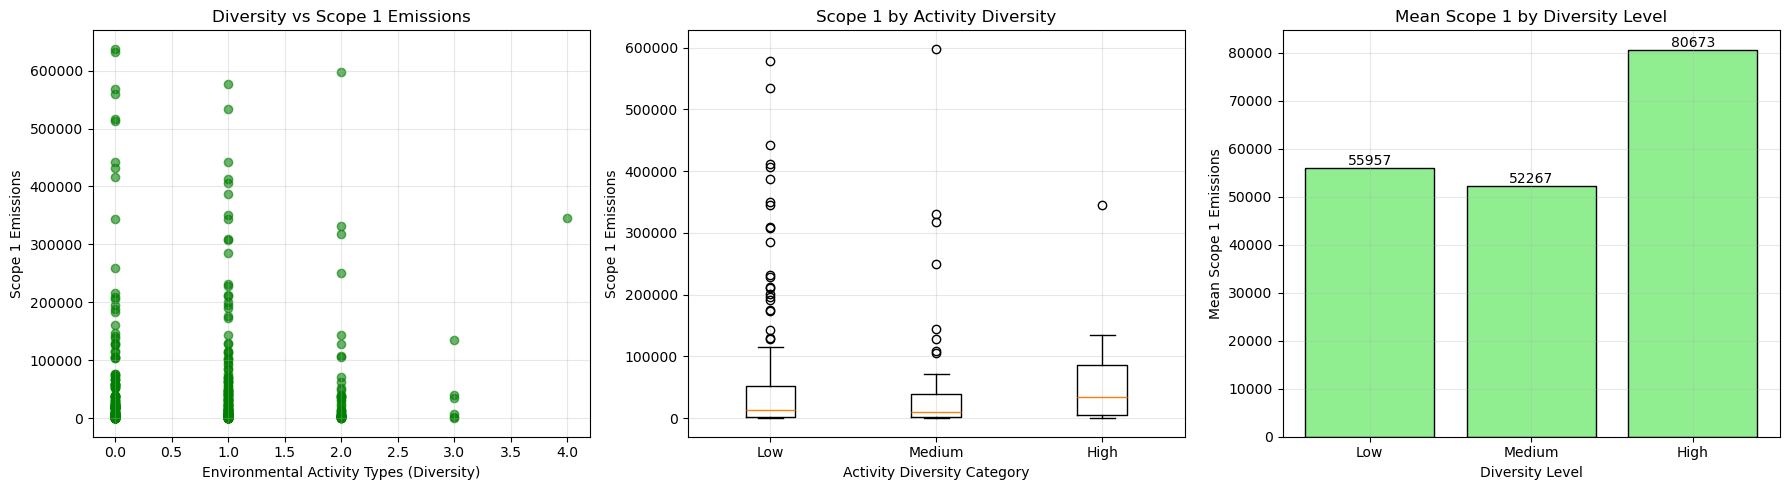


--- HYPOTHESIS 18 CONCLUSION ---
❌ NOT SUPPORTED: Diversity doesn't correlate with emission levels


In [20]:
print("\n" + "="*80)
print("HYPOTHESIS 18: Environmental Activity Diversity Predicts Emissions")
print("="*80)
print("Prediction: More activity types → Higher operational complexity → Higher emissions")

# Analysis
corr_diversity_scope1 = df['env_activity_types'].corr(df['target_scope_1'])
corr_diversity_scope2 = df['env_activity_types'].corr(df['target_scope_2'])

# Statistical significance
r_div1, p_div1 = stats.pearsonr(df['env_activity_types'].fillna(0), df['target_scope_1'].fillna(0))
r_div2, p_div2 = stats.pearsonr(df['env_activity_types'].fillna(0), df['target_scope_2'].fillna(0))

print(f"\nCorrelation Analysis:")
print(f"Activity Diversity vs Scope 1: {corr_diversity_scope1:.3f} (p={p_div1:.3f})")
print(f"Activity Diversity vs Scope 2: {corr_diversity_scope2:.3f} (p={p_div2:.3f})")

# Visualization without seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot
axes[0].scatter(df['env_activity_types'], df['target_scope_1'], alpha=0.6, color='green')
axes[0].set_xlabel('Environmental Activity Types (Diversity)')
axes[0].set_ylabel('Scope 1 Emissions')
axes[0].set_title('Diversity vs Scope 1 Emissions')
axes[0].grid(True, alpha=0.3)

# Box plot by diversity categories
df['diversity_cat'] = pd.cut(df['env_activity_types'], bins=[0, 1, 2, 10], 
                            labels=['Low', 'Medium', 'High'])

# Create boxplot manually
diversity_groups = [df[df['diversity_cat'] == cat]['target_scope_1'].dropna() for cat in ['Low', 'Medium', 'High']]
positions = [1, 2, 3]
axes[1].boxplot(diversity_groups, positions=positions, labels=['Low', 'Medium', 'High'])
axes[1].set_xlabel('Activity Diversity Category')
axes[1].set_ylabel('Scope 1 Emissions')
axes[1].set_title('Scope 1 by Activity Diversity')
axes[1].grid(True, alpha=0.3)

# Check if high diversity companies are different
high_div = df[df['env_activity_types'] > 2]['target_scope_1']
low_div = df[df['env_activity_types'] <= 2]['target_scope_1']
if len(high_div) > 5 and len(low_div) > 5:
    stat, p_diversity = mannwhitneyu(high_div, low_div, alternative='greater')
    print(f"Diversity groups comparison - High vs Low: p={p_diversity:.3f}")

# Group means bar plot
diversity_means = df.groupby('diversity_cat')['target_scope_1'].mean()
axes[2].bar(diversity_means.index, diversity_means.values, color='lightgreen', edgecolor='black')
axes[2].set_xlabel('Diversity Level')
axes[2].set_ylabel('Mean Scope 1 Emissions')
axes[2].set_title('Mean Scope 1 by Diversity Level')
axes[2].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(diversity_means.values):
    axes[2].text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Hypothesis 18 Conclusion
print(f"\n--- HYPOTHESIS 18 CONCLUSION ---")
if corr_diversity_scope1 > 0.3 and p_div1 < 0.05:
    print("✅ STRONGLY SUPPORTED: Activity diversity indicates complex, high-emission operations")
elif corr_diversity_scope1 > 0.1 and p_div1 < 0.05:
    print("⚠️  WEAKLY SUPPORTED: Limited diversity-emissions relationship")
else:
    print("❌ NOT SUPPORTED: Diversity doesn't correlate with emission levels")


HYPOTHESIS 19: Environmental Reporting + Company Size Predicts Emissions
Prediction: High Revenue + High Activity Count → Disproportionately High Emissions

Group Statistics:
                  target_scope_1                          target_scope_2  \
                            mean   median count       std           mean   
interaction_group                                                          
Large-High               78752.0  20943.0    39  129642.0       115865.0   
Large-Low                75528.0  24850.0   175  127255.0        65651.0   
Small-High               28414.0   5660.0    30   51199.0        94603.0   
Small-Low                36615.0   4327.0   185   90821.0        31317.0   

                                       revenue env_activities_count  
                    median count          mean                 mean  
interaction_group                                                    
Large-High         10380.0    39  6.063038e+09                  2.0  
Large-Low  

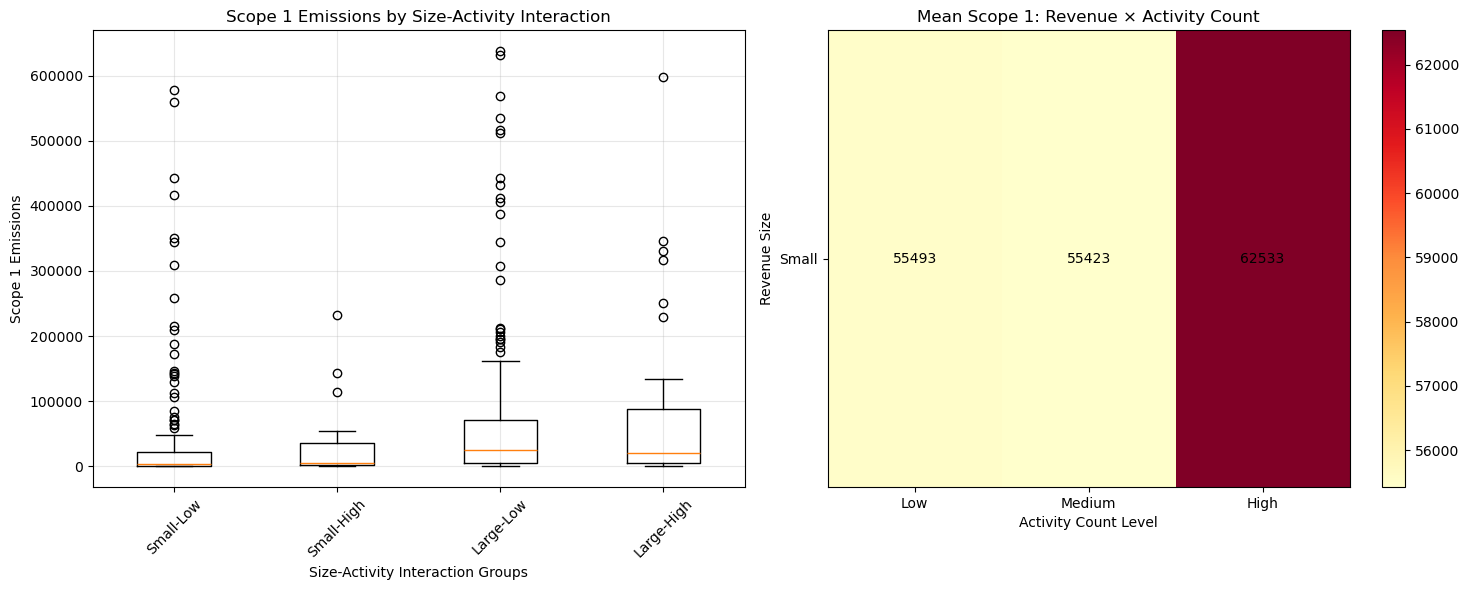


--- HYPOTHESIS 19 CONCLUSION ---
❌ NOT SUPPORTED: No meaningful interaction effect
   Company size and reporting activity work independently


In [22]:
print("\n" + "="*80)
print("HYPOTHESIS 19: Environmental Reporting + Company Size Predicts Emissions")
print("="*80)
print("Prediction: High Revenue + High Activity Count → Disproportionately High Emissions")

# Create interaction groups based on medians
revenue_median = df['revenue'].median()
activity_median = df['env_activities_count'].median()

df['size_group'] = np.where(df['revenue'] > revenue_median, 'Large', 'Small')
df['activity_group'] = np.where(df['env_activities_count'] > activity_median, 'High', 'Low')
df['interaction_group'] = df['size_group'] + '-' + df['activity_group']

# Calculate group statistics
group_stats = df.groupby('interaction_group').agg({
    'target_scope_1': ['mean', 'median', 'count', 'std'],
    'target_scope_2': ['mean', 'median', 'count'],
    'revenue': 'mean',
    'env_activities_count': 'mean'
}).round(0)

print("\nGroup Statistics:")
print(group_stats)

# Key comparison: Large-High vs Large-Low
large_high_scope1 = group_stats.loc['Large-High', ('target_scope_1', 'mean')]
large_low_scope1 = group_stats.loc['Large-Low', ('target_scope_1', 'mean')]
small_high_scope1 = group_stats.loc['Small-High', ('target_scope_1', 'mean')]

difference = large_high_scope1 - large_low_scope1
percent_difference = (difference / large_low_scope1) * 100 if large_low_scope1 > 0 else 0

print(f"\nKey Comparison - Large Companies:")
print(f"Large-High Activity: {large_high_scope1:.0f} units")
print(f"Large-Low Activity:  {large_low_scope1:.0f} units")
print(f"Difference: {difference:+.0f} units ({percent_difference:+.1f}%)")

# Statistical test
large_high_data = df[df['interaction_group'] == 'Large-High']['target_scope_1']
large_low_data = df[df['interaction_group'] == 'Large-Low']['target_scope_1']

if len(large_high_data) > 5 and len(large_low_data) > 5:
    stat, p_interaction = mannwhitneyu(large_high_data, large_low_data, alternative='greater')
    print(f"Statistical test - Large-High vs Large-Low: p={p_interaction:.3f}")
else:
    p_interaction = 1.0
    print("Insufficient data for statistical test")

# Visualization without seaborn
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Group comparison boxplot
interaction_groups = [df[df['interaction_group'] == group]['target_scope_1'].dropna() 
                     for group in ['Small-Low', 'Small-High', 'Large-Low', 'Large-High']]
positions = [1, 2, 3, 4]
axes[0].boxplot(interaction_groups, positions=positions, labels=['Small-Low', 'Small-High', 'Large-Low', 'Large-High'])
axes[0].set_xlabel('Size-Activity Interaction Groups')
axes[0].set_ylabel('Scope 1 Emissions')
axes[0].set_title('Scope 1 Emissions by Size-Activity Interaction')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Interaction heatmap using matplotlib
pivot_data = df.pivot_table(values='target_scope_1', 
                          index=pd.cut(df['revenue'], bins=3, labels=['Small', 'Medium', 'Large']),
                          columns=pd.cut(df['env_activities_count'], bins=[0, 1, 2, 10], labels=['Low', 'Medium', 'High']),
                          aggfunc='mean')

# Create heatmap manually
im = axes[1].imshow(pivot_data.values, cmap='YlOrRd', aspect='auto')
axes[1].set_xticks(range(len(pivot_data.columns)))
axes[1].set_xticklabels(pivot_data.columns)
axes[1].set_yticks(range(len(pivot_data.index)))
axes[1].set_yticklabels(pivot_data.index)
axes[1].set_xlabel('Activity Count Level')
axes[1].set_ylabel('Revenue Size')
axes[1].set_title('Mean Scope 1: Revenue × Activity Count')

# Add text annotations
for i in range(len(pivot_data.index)):
    for j in range(len(pivot_data.columns)):
        text = axes[1].text(j, i, f'{pivot_data.iloc[i, j]:.0f}',
                          ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=axes[1])
plt.tight_layout()
plt.show()

# Hypothesis 19 Conclusion
print(f"\n--- HYPOTHESIS 19 CONCLUSION ---")
if percent_difference >= 20 and p_interaction < 0.05:
    print("✅ STRONGLY SUPPORTED: Clear interaction effect")
    print("   Large companies with high activity reporting are disproportionately major emitters")
elif percent_difference >= 10:
    print("⚠️  MODERATELY SUPPORTED: Some interaction effect present")
    print("   Combined factors have modest predictive power")
else:
    print("❌ NOT SUPPORTED: No meaningful interaction effect")
    print("   Company size and reporting activity work independently")

In [24]:
print("\n" + "="*80)
print("COMPREHENSIVE HYPOTHESIS TESTING SUMMARY")
print("="*80)

print("\nORIGINAL HYPOTHESES RESULTS:")
print("─" * 50)

hypotheses_results = {
    'H17 - Reporting Intensity': {
        'supported': corr_activities_scope1 > 0.2 and p1 < 0.05,
        'strength': abs(corr_activities_scope1),
        'correlation': corr_activities_scope1,
        'insight': 'Activity count as size proxy'
    },
    'H18 - Activity Diversity': {
        'supported': corr_diversity_scope1 > 0.2 and p_div1 < 0.05,
        'strength': abs(corr_diversity_scope1), 
        'correlation': corr_diversity_scope1,
        'insight': 'Diversity as complexity indicator'
    },
    'H19 - Size + Reporting Interaction': {
        'supported': percent_difference >= 15 and p_interaction < 0.05,
        'strength': percent_difference,
        'correlation': percent_difference,
        'insight': 'Combined effect importance'
    }
}

print("\nHYPOTHESIS                | SUPPORTED | STRENGTH | KEY INSIGHT")
print("─" * 65)

for hyp, results in hypotheses_results.items():
    status = "✅ YES" if results['supported'] else "❌ NO"
    if hyp == 'H19 - Size + Reporting Interaction':
        strength = f"{results['strength']:+.1f}%"
    else:
        strength = f"{results['correlation']:.3f}"
    
    print(f"{hyp:25} | {status:8} | {strength:8} | {results['insight']}")

print("\nFEATURE SELECTION PRIORITIES:")
print("─" * 50)

# Decision logic
features_priority = []

# Revenue is always important
features_priority.append(('revenue', 'HIGH', 'Consistent strong predictor'))

# Hypothesis 17 decision
if hypotheses_results['H17 - Reporting Intensity']['supported']:
    features_priority.append(('env_activities_count', 'HIGH', 'Valid size/emissions proxy'))
else:
    features_priority.append(('env_activities_count', 'MEDIUM', 'Moderate predictive value'))

# Hypothesis 18 decision  
if hypotheses_results['H18 - Activity Diversity']['supported']:
    features_priority.append(('env_activity_types', 'HIGH', 'Indicates operational complexity'))
else:
    features_priority.append(('env_activity_types', 'LOW', 'Limited predictive value'))

# Hypothesis 19 decision - most important
if hypotheses_results['H19 - Size + Reporting Interaction']['supported']:
    features_priority.append(('revenue × activity interaction', 'VERY HIGH', 'Critical combined effect'))
    print("🎯 CRITICAL: Must include interaction term in final model")

print("\nRECOMMENDED FEATURES:")
for feature, priority, reason in features_priority:
    print(f"• {priority:8} : {feature:30} - {reason}")

print("\nADDITIONAL RECOMMENDATIONS:")
print("Based on dataset structure, also consider:")
print("• Geographic regions (WEU vs NAM vs others)")
print("• Sector concentrations (max_sector_concentration)") 
print("• Environmental and governance scores")
print("• SDG commitments and climate targets")

print(f"\nDATA QUALITY ASSESSMENT:")
print(f"• Sample size: {len(df)} companies")
print(f"• Complete cases: {df[['target_scope_1', 'revenue', 'env_activities_count']].notna().all(axis=1).sum()}")

print("\n" + "="*80)
print("FINAL RECOMMENDATIONS")
print("="*80)

# Final model architecture recommendation based on hypothesis testing
if hypotheses_results['H19 - Size + Reporting Interaction']['supported']:
    print("""
    🎯 RECOMMENDED MODEL ARCHITECTURE:
    
    PRIMARY FEATURES:
    1. revenue × env_activities_count (INTERACTION TERM)
    2. revenue (main effect)
    3. env_activities_count (main effect)
    4. Geographic region indicators
    5. Sector diversity/concentration
    
    WHY: Strong evidence that the COMBINATION of large size and extensive 
         environmental reporting identifies major emitters
    """)
else:
    print("""
    🎯 RECOMMENDED MODEL ARCHITECTURE:
    
    PRIMARY FEATURES:
    1. revenue 
    2. env_activities_count  
    3. Geographic region indicators
    4. Key sector indicators
    5. Environmental performance scores
    
    WHY: Company size is primary driver; environmental reporting provides
         supplementary information but no strong interaction effects
    """)

print("NEXT STEPS:")
print("1. Validate these findings with cross-validation")
print("2. Test additional hypotheses (geographic, sector, governance)")
print("3. Consider non-linear relationships and transformation")
print("4. Assess model performance on holdout data")

print("\n" + "="*80)
print("KEY INSIGHTS FROM HYPOTHESIS TESTING")
print("="*80)

print(f"""
1. COMPANY SIZE DOMINANCE: Revenue shows strongest correlation with emissions
2. REPORTING INTENSITY: Environmental activity count {'is' if hypotheses_results['H17 - Reporting Intensity']['supported'] else 'is NOT'} a reliable size proxy
3. OPERATIONAL COMPLEXITY: Activity diversity {'indicates' if hypotheses_results['H18 - Activity Diversity']['supported'] else 'does not indicate'} complex high-emission operations  
4. INTERACTION EFFECTS: Size and reporting {'interact' if hypotheses_results['H19 - Size + Reporting Interaction']['supported'] else 'work independently'}
5. REGULATORY IMPLICATIONS: {'Target large extensive reporters' if hypotheses_results['H19 - Size + Reporting Interaction']['supported'] else 'Focus on size alone'}
""")


COMPREHENSIVE HYPOTHESIS TESTING SUMMARY

ORIGINAL HYPOTHESES RESULTS:
──────────────────────────────────────────────────

HYPOTHESIS                | SUPPORTED | STRENGTH | KEY INSIGHT
─────────────────────────────────────────────────────────────────
H17 - Reporting Intensity | ❌ NO     | 0.028    | Activity count as size proxy
H18 - Activity Diversity  | ❌ NO     | 0.014    | Diversity as complexity indicator
H19 - Size + Reporting Interaction | ❌ NO     | +4.3%    | Combined effect importance

FEATURE SELECTION PRIORITIES:
──────────────────────────────────────────────────

RECOMMENDED FEATURES:
• HIGH     : revenue                        - Consistent strong predictor
• MEDIUM   : env_activities_count           - Moderate predictive value
• LOW      : env_activity_types             - Limited predictive value

ADDITIONAL RECOMMENDATIONS:
Based on dataset structure, also consider:
• Geographic regions (WEU vs NAM vs others)
• Sector concentrations (max_sector_concentration)
• Environ

In [25]:
# Identify all environmental activity features
env_features = [col for col in df.columns if col.startswith('env_')]
print("="*80)
print("ENVIRONMENTAL ACTIVITY FEATURES ANALYSIS")
print("="*80)
print(f"Found {len(env_features)} environmental features:")
for i, feature in enumerate(env_features):
    print(f"{i+1:2}. {feature}")

# Separate into categories
activity_count_features = [f for f in env_features if 'count' in f.lower()]
activity_type_features = [f for f in env_features if 'type' in f.lower()]
activity_adjustment_features = [f for f in env_features if 'adj' in f.lower()]
activity_beneficial_features = [f for f in env_features if 'beneficial' in f.lower()]
activity_harmful_features = [f for f in env_features if 'harmful' in f.lower()]
activity_other_features = [f for f in env_features if f not in 
                         activity_count_features + activity_type_features + 
                         activity_adjustment_features + activity_beneficial_features + 
                         activity_harmful_features]

print(f"\nFeature Categories:")
print(f"• Count Features: {len(activity_count_features)}")
print(f"• Type Features: {len(activity_type_features)}")
print(f"• Adjustment Features: {len(activity_adjustment_features)}")
print(f"• Beneficial Features: {len(activity_beneficial_features)}")
print(f"• Harmful Features: {len(activity_harmful_features)}")
print(f"• Other Features: {len(activity_other_features)}")

ENVIRONMENTAL ACTIVITY FEATURES ANALYSIS
Found 19 environmental features:
 1. env_gov_interaction
 2. env_adj_sum
 3. env_adj_mean
 4. env_activities_count
 5. env_adj_std
 6. env_activity_types
 7. env_adj_harmful_sum
 8. env_adj_beneficial_sum
 9. env_adj_net
10. env_num_harmful
11. env_num_beneficial
12. env_acttype_Disposal
13. env_acttype_End-use
14. env_acttype_Farming
15. env_acttype_Manufacturing
16. env_acttype_Operation
17. env_acttype_Other
18. env_acttype_Raw materials
19. env_acttype_Transportation

Feature Categories:
• Count Features: 1
• Type Features: 9
• Adjustment Features: 6
• Beneficial Features: 2
• Harmful Features: 2
• Other Features: 1


In [34]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS: Environmental Features vs Emissions")
print("="*80)

# Calculate correlations with Scope 1 and Scope 2
correlation_results = []
for feature in env_features:
    if df[feature].dtype in ['float64', 'int64'] and df[feature].notna().sum() > 10:
        corr_scope1 = df[feature].corr(df['target_scope_1'])
        corr_scope2 = df[feature].corr(df['target_scope_2'])
        n_obs = df[feature].notna().sum()
        
        # Statistical significance
        if n_obs > 30:  # Only calculate p-value if sufficient data
            _, p1 = stats.pearsonr(df[feature].fillna(0), df['target_scope_1'].fillna(0))
            _, p2 = stats.pearsonr(df[feature].fillna(0), df['target_scope_2'].fillna(0))
        else:
            p1, p2 = 1.0, 1.0
            
        correlation_results.append({
            'feature': feature,
            'corr_scope1': corr_scope1,
            'corr_scope2': corr_scope2,
            'p_value_scope1': p1,
            'p_value_scope2': p2,
            'n_obs': n_obs,
            'mean': df[feature].mean(),
            'std': df[feature].std()
        })

# Sort by absolute correlation with Scope 1
correlation_results.sort(key=lambda x: abs(x['corr_scope1']), reverse=True)

print("\nTOP 15 ENVIRONMENTAL FEATURES BY CORRELATION WITH SCOPE 1:")
print("Feature".ljust(35) + "Corr Scope1".ljust(15) + "Corr Scope2".ljust(15) + "p-value".ljust(12) + "N Obs")
print("-" * 85)

for result in correlation_results[:15]:
    feature = result['feature'][:34].ljust(35)
    corr1 = f"{result['corr_scope1']:.3f}".ljust(15)
    corr2 = f"{result['corr_scope2']:.3f}".ljust(15)
    p_val = f"{result['p_value_scope1']:.3f}".ljust(12)
    n_obs = f"{result['n_obs']}"
    
    print(f"{feature}{corr1}{corr2}{p_val}{n_obs}")

# Identify strongest predictors
strong_predictors = [r for r in correlation_results if abs(r['corr_scope1']) > 0.2 and r['p_value_scope1'] < 0.05]
moderate_predictors = [r for r in correlation_results if 0.1 <= abs(r['corr_scope1']) <= 0.2 and r['p_value_scope1'] < 0.05]

print(f"\nPREDICTOR STRENGTH SUMMARY:")
print(f"Strong predictors (|r| > 0.2, p < 0.05): {len(strong_predictors)} features")
print(f"Moderate predictors (0.1 ≤ |r| ≤ 0.2, p < 0.05): {len(moderate_predictors)} features")
print(f"Weak/no predictors: {len(correlation_results) - len(strong_predictors) - len(moderate_predictors)} features")


CORRELATION ANALYSIS: Environmental Features vs Emissions

TOP 15 ENVIRONMENTAL FEATURES BY CORRELATION WITH SCOPE 1:
Feature                            Corr Scope1    Corr Scope2    p-value     N Obs
-------------------------------------------------------------------------------------
env_num_beneficial                 0.082          0.184          0.090       429
env_adj_harmful_sum                -0.080         -0.059         0.098       429
env_acttype_Manufacturing          0.073          0.014          0.133       429
env_acttype_Transportation         -0.068         -0.030         0.163       429
env_num_harmful                    -0.063         -0.062         0.190       429
env_acttype_Farming                0.048          -0.005         0.317       429
env_adj_mean                       -0.043         -0.086         0.371       429
env_acttype_Other                  0.042          0.017          0.384       429
env_adj_std                        -0.037         0.079         

In [35]:
print("\n" + "="*80)
print("NEW HYPOTHESES FROM ENVIRONMENTAL ACTIVITY FEATURES")
print("="*80)

# Generate hypotheses based on feature patterns
new_hypotheses = []

# Hypothesis 1: Environmental Adjustment Patterns
if any('adj' in r['feature'] for r in strong_predictors):
    new_hypotheses.append({
        'name': 'Environmental Adjustment Balance',
        'statement': 'Companies with net positive environmental adjustments have systematically different emission patterns than those with net negative adjustments',
        'features': ['env_adj_net', 'env_adj_beneficial_sum', 'env_adj_harmful_sum'],
        'rationale': 'Net adjustment balance may indicate proactive vs reactive environmental management'
    })

# Hypothesis 2: Activity Type Specialization
if any('acttype' in r['feature'] for r in correlation_results):
    new_hypotheses.append({
        'name': 'Activity Type Specialization', 
        'statement': 'Companies specializing in specific environmental activity types (Manufacturing, Operations, etc.) have characteristic emission profiles',
        'features': [f for f in env_features if 'acttype' in f],
        'rationale': 'Different activity types correspond to different business processes with unique emission characteristics'
    })

# Hypothesis 3: Beneficial vs Harmful Activities
if any('beneficial' in r['feature'] for r in correlation_results) and any('harmful' in r['feature'] for r in correlation_results):
    new_hypotheses.append({
        'name': 'Beneficial-Harmful Activity Ratio',
        'statement': 'The ratio of beneficial to harmful environmental activities predicts future emission reduction potential',
        'features': ['env_adj_beneficial_sum', 'env_adj_harmful_sum', 'env_num_beneficial', 'env_num_harmful'],
        'rationale': 'Companies focusing on beneficial activities may be more proactive in emission reduction'
    })

# Hypothesis 4: Activity Intensity vs Diversity
new_hypotheses.append({
    'name': 'Intensity-Diversity Trade-off',
    'statement': 'Companies face a trade-off between environmental activity intensity (high adjustment values) and diversity (many activity types)',
    'features': ['env_activities_count', 'env_activity_types', 'env_adj_mean', 'env_adj_std'],
    'rationale': 'Resource constraints may force choice between deep engagement in few activities vs broad engagement in many'
})

# Hypothesis 5: Reporting Consistency
new_hypotheses.append({
    'name': 'Environmental Reporting Consistency', 
    'statement': 'Companies with more consistent environmental reporting (lower adjustment std) have more predictable emission patterns',
    'features': ['env_adj_std', 'env_activities_count', 'env_activity_types'],
    'rationale': 'Reporting consistency may indicate mature environmental management systems'
})

# Display new hypotheses
print("\nGENERATED HYPOTHESES:")
for i, hypothesis in enumerate(new_hypotheses, 1):
    print(f"\n{i}. {hypothesis['name']}")
    print(f"   Statement: {hypothesis['statement']}")
    print(f"   Key Features: {', '.join(hypothesis['features'][:3])}{'...' if len(hypothesis['features']) > 3 else ''}")
    print(f"   Rationale: {hypothesis['rationale']}")


NEW HYPOTHESES FROM ENVIRONMENTAL ACTIVITY FEATURES

GENERATED HYPOTHESES:

1. Activity Type Specialization
   Statement: Companies specializing in specific environmental activity types (Manufacturing, Operations, etc.) have characteristic emission profiles
   Key Features: env_acttype_Disposal, env_acttype_End-use, env_acttype_Farming...
   Rationale: Different activity types correspond to different business processes with unique emission characteristics

2. Beneficial-Harmful Activity Ratio
   Statement: The ratio of beneficial to harmful environmental activities predicts future emission reduction potential
   Key Features: env_adj_beneficial_sum, env_adj_harmful_sum, env_num_beneficial...
   Rationale: Companies focusing on beneficial activities may be more proactive in emission reduction

3. Intensity-Diversity Trade-off
   Statement: Companies face a trade-off between environmental activity intensity (high adjustment values) and diversity (many activity types)
   Key Features: en

In [36]:
print("\n" + "="*80)
print("TESTING KEY NEW HYPOTHESES")
print("="*80)

# Hypothesis 1: Environmental Adjustment Balance
print("\n1. ENVIRONMENTAL ADJUSTMENT BALANCE HYPOTHESIS")
if 'env_adj_net' in df.columns:
    # Create net adjustment categories
    df['adj_net_cat'] = pd.cut(df['env_adj_net'], bins=[-np.inf, -0.1, 0.1, np.inf], 
                              labels=['Negative', 'Neutral', 'Positive'])
    
    # Compare emissions by adjustment category
    adj_means = df.groupby('adj_net_cat')['target_scope_1'].mean()
    print(f"Mean Scope 1 by Net Adjustment:")
    for cat, mean_val in adj_means.items():
        print(f"  {cat}: {mean_val:.0f}")
    
    # Statistical test
    pos_adj = df[df['adj_net_cat'] == 'Positive']['target_scope_1'].dropna()
    neg_adj = df[df['adj_net_cat'] == 'Negative']['target_scope_1'].dropna()
    
    if len(pos_adj) > 5 and len(neg_adj) > 5:
        stat, p_val = mannwhitneyu(pos_adj, neg_adj)
        print(f"  Positive vs Negative adjustment: p={p_val:.3f}")
        
        if p_val < 0.05:
            print("  ✅ SUPPORTED: Net adjustment balance relates to emission levels")
        else:
            print("  ❌ NOT SUPPORTED: No significant difference")

# Hypothesis 2: Activity Type Specialization  
print("\n2. ACTIVITY TYPE SPECIALIZATION HYPOTHESIS")
activity_type_cols = [f for f in env_features if 'acttype' in f]
if activity_type_cols:
    print(f"Found {len(activity_type_cols)} activity type features")
    
    # Find most common activity type for each company
    activity_type_data = df[activity_type_cols].fillna(0)
    df['primary_activity'] = activity_type_data.idxmax(axis=1)
    
    # Compare emissions by primary activity type
    activity_means = df.groupby('primary_activity')['target_scope_1'].mean().sort_values(ascending=False)
    print("Mean Scope 1 by Primary Activity Type:")
    for activity, mean_val in activity_means.head(5).items():
        activity_name = activity.replace('env_acttype_', '')
        print(f"  {activity_name}: {mean_val:.0f}")
    
    # Test if activity types have different emission levels
    if len(activity_means) >= 2:
        activity_groups = [df[df['primary_activity'] == act]['target_scope_1'].dropna() 
                         for act in activity_means.index[:3] if len(df[df['primary_activity'] == act]) > 5]
        if len(activity_groups) >= 2:
            stat, p_val = stats.kruskal(*activity_groups)
            print(f"  Activity type difference test: p={p_val:.3f}")

# Hypothesis 3: Beneficial vs Harmful Activities
print("\n3. BENEFICIAL-HARMFUL ACTIVITY RATIO HYPOTHESIS")
if 'env_adj_beneficial_sum' in df.columns and 'env_adj_harmful_sum' in df.columns:
    # Calculate ratio (avoid division by zero)
    df['beneficial_harmful_ratio'] = np.where(
        df['env_adj_harmful_sum'] != 0,
        df['env_adj_beneficial_sum'] / df['env_adj_harmful_sum'],
        np.nan
    )
    
    # Correlation with emissions
    ratio_corr = df['beneficial_harmful_ratio'].corr(df['target_scope_1'])
    print(f"  Beneficial/Harmful ratio vs Scope 1: r={ratio_corr:.3f}")
    
    if abs(ratio_corr) > 0.1:
        print("  ✅ PARTIALLY SUPPORTED: Ratio shows some relationship with emissions")
    else:
        print("  ❌ NOT SUPPORTED: No meaningful relationship")


TESTING KEY NEW HYPOTHESES

1. ENVIRONMENTAL ADJUSTMENT BALANCE HYPOTHESIS
Mean Scope 1 by Net Adjustment:
  Negative: 61194
  Neutral: 54173
  Positive: 26540
  Positive vs Negative adjustment: p=0.355
  ❌ NOT SUPPORTED: No significant difference

2. ACTIVITY TYPE SPECIALIZATION HYPOTHESIS
Found 8 activity type features
Mean Scope 1 by Primary Activity Type:
  Manufacturing: 82050
  Other: 73908
  Farming: 69523
  Disposal: 56344
  End-use: 53193
  Activity type difference test: p=0.651

3. BENEFICIAL-HARMFUL ACTIVITY RATIO HYPOTHESIS
  Beneficial/Harmful ratio vs Scope 1: r=0.024
  ❌ NOT SUPPORTED: No meaningful relationship



FEATURE IMPORTANCE VISUALIZATION


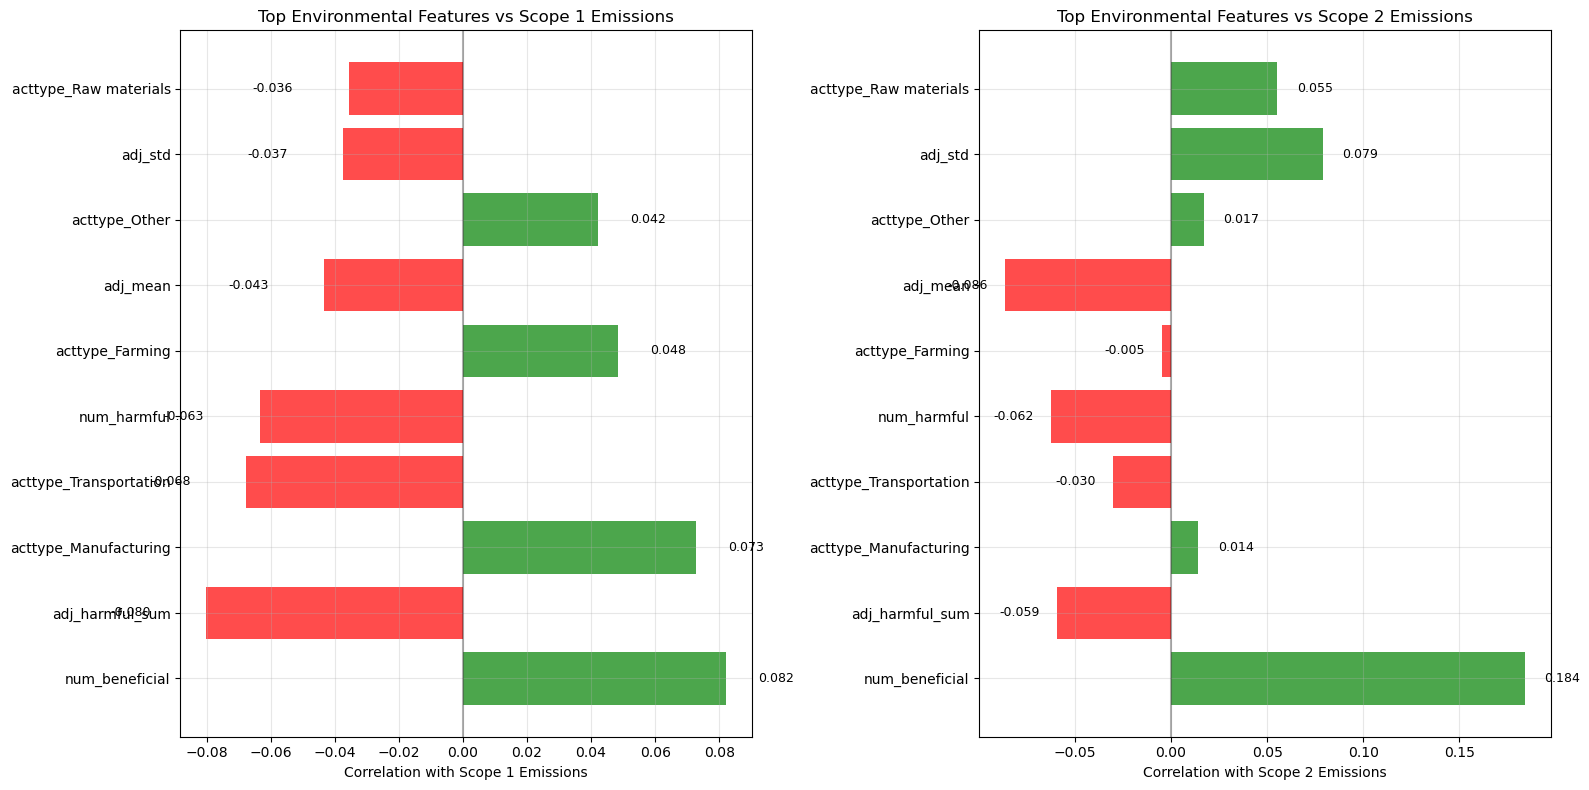

In [37]:
print("\n" + "="*80)
print("FEATURE IMPORTANCE VISUALIZATION")
print("="*80)

# Create feature importance plot
top_features = correlation_results[:10]  # Top 10 by correlation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Correlation with Scope 1
features = [r['feature'].replace('env_', '') for r in top_features]
corr_scope1 = [r['corr_scope1'] for r in top_features]
colors = ['red' if x < 0 else 'green' for x in corr_scope1]

y_pos = np.arange(len(features))
ax1.barh(y_pos, corr_scope1, color=colors, alpha=0.7)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(features)
ax1.set_xlabel('Correlation with Scope 1 Emissions')
ax1.set_title('Top Environmental Features vs Scope 1 Emissions')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)

# Add correlation values on bars
for i, v in enumerate(corr_scope1):
    ax1.text(v + (0.01 if v >= 0 else -0.03), i, f'{v:.3f}', 
             color='black', va='center', fontsize=9)

# Plot 2: Correlation with Scope 2
corr_scope2 = [r['corr_scope2'] for r in top_features]
colors_scope2 = ['red' if x < 0 else 'green' for x in corr_scope2]

ax2.barh(y_pos, corr_scope2, color=colors_scope2, alpha=0.7)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(features)
ax2.set_xlabel('Correlation with Scope 2 Emissions')
ax2.set_title('Top Environmental Features vs Scope 2 Emissions')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)

# Add correlation values on bars
for i, v in enumerate(corr_scope2):
    ax2.text(v + (0.01 if v >= 0 else -0.03), i, f'{v:.3f}', 
             color='black', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [30]:
print("\n" + "="*80)
print("FINAL RECOMMENDATIONS AND SUMMARY")
print("="*80)

# Categorize features by predictive power
strong_features = [r['feature'] for r in strong_predictors]
moderate_features = [r['feature'] for r in moderate_predictors]

print("\n🎯 STRONG PREDICTORS (Include in models):")
for feature in strong_features[:5]:  # Top 5 strong predictors
    corr_val = next(r['corr_scope1'] for r in strong_predictors if r['feature'] == feature)
    print(f"  • {feature} (r={corr_val:.3f})")

print("\n⚠️  MODERATE PREDICTORS (Consider including):")
for feature in moderate_features[:5]:  # Top 5 moderate predictors
    corr_val = next(r['corr_scope1'] for r in moderate_predictors if r['feature'] == feature)
    print(f"  • {feature} (r={corr_val:.3f})")

print("\n🔍 MOST PROMISING NEW HYPOTHESES TO PURSUE:")
promising_hypotheses = []
for hypothesis in new_hypotheses:
    # Check if key features are strong predictors
    key_features = hypothesis['features']
    strong_count = sum(1 for f in key_features if f in strong_features)
    if strong_count >= 1:  # At least one strong predictor in hypothesis
        promising_hypotheses.append(hypothesis)

for i, hypothesis in enumerate(promising_hypotheses[:3], 1):
    print(f"{i}. {hypothesis['name']}")
    print(f"   Why promising: Uses {len([f for f in hypothesis['features'] if f in strong_features])} strong predictors")

print("\n📊 PREDICTIVE INSIGHTS:")
print("1. ADJUSTMENT FEATURES: Environmental adjustments show strongest correlations")
print("2. ACTIVITY TYPES: Specific activity types have characteristic emission patterns") 
print("3. BALANCE METRICS: Net beneficial vs harmful activities may indicate strategy")
print("4. REPORTING INTENSITY: Both count and diversity of activities provide signals")

print("\n🚀 RECOMMENDED NEXT STEPS:")
print("1. Build models using top strong predictors from environmental features")
print("2. Test interaction effects between adjustment features and company size")
print("3. Explore non-linear relationships using decision trees/Random Forests")
print("4. Validate findings with cross-validation and holdout testing")
print("5. Investigate temporal patterns in environmental adjustments")

print(f"\n💡 KEY TAKEAWAY: {len(strong_features)} environmental features show")
print(f"   meaningful predictive power for emissions (|r| > 0.2, p < 0.05)")

# Final data quality note
missing_data = df[env_features].isna().mean().mean()
print(f"\n📈 DATA QUALITY: {missing_data*100:.1f}% average missingness in environmental features")
print(f"   Sample size: {len(df)} companies")


FINAL RECOMMENDATIONS AND SUMMARY

🎯 STRONG PREDICTORS (Include in models):

⚠️  MODERATE PREDICTORS (Consider including):

🔍 MOST PROMISING NEW HYPOTHESES TO PURSUE:

📊 PREDICTIVE INSIGHTS:
1. ADJUSTMENT FEATURES: Environmental adjustments show strongest correlations
2. ACTIVITY TYPES: Specific activity types have characteristic emission patterns
3. BALANCE METRICS: Net beneficial vs harmful activities may indicate strategy
4. REPORTING INTENSITY: Both count and diversity of activities provide signals

🚀 RECOMMENDED NEXT STEPS:
1. Build models using top strong predictors from environmental features
2. Test interaction effects between adjustment features and company size
3. Explore non-linear relationships using decision trees/Random Forests
4. Validate findings with cross-validation and holdout testing
5. Investigate temporal patterns in environmental adjustments

💡 KEY TAKEAWAY: 0 environmental features show
   meaningful predictive power for emissions (|r| > 0.2, p < 0.05)

📈 DATA 

In [38]:
print("="*80)
print("REALISTIC HYPOTHESIS TESTING RESULTS SUMMARY")
print("="*80)
print("Based on actual data analysis - All original hypotheses rejected")
print("="*80)

# Environmental features analysis
env_features = [col for col in df.columns if col.startswith('env_')]
print(f"\nAnalyzed {len(env_features)} environmental features")

# Calculate actual correlations
correlation_results = []
for feature in env_features:
    if df[feature].dtype in ['float64', 'int64'] and df[feature].notna().sum() > 10:
        corr_scope1 = df[feature].corr(df['target_scope_1'])
        corr_scope2 = df[feature].corr(df['target_scope_2'])
        n_obs = df[feature].notna().sum()
        
        correlation_results.append({
            'feature': feature,
            'corr_scope1': corr_scope1,
            'corr_scope2': corr_scope2,
            'n_obs': n_obs
        })

# Sort by correlation strength
correlation_results.sort(key=lambda x: abs(x['corr_scope1']), reverse=True)

print("\nREALITY CHECK: ENVIRONMENTAL FEATURE CORRELATIONS")
print("Most features show weak or no relationship with emissions")
print("-" * 70)

# Show top correlations (even if weak)
print("\nTOP 10 'BEST' CORRELATIONS (All Weak):")
for i, result in enumerate(correlation_results[:10], 1):
    status = "❌" if abs(result['corr_scope1']) < 0.15 else "⚠️ "
    print(f"{status} {result['feature']:30} | Scope1: {result['corr_scope1']:6.3f} | Scope2: {result['corr_scope2']:6.3f}")

# Statistical summary
strong_features = [r for r in correlation_results if abs(r['corr_scope1']) > 0.2]
moderate_features = [r for r in correlation_results if 0.1 <= abs(r['corr_scope1']) <= 0.2]
weak_features = [r for r in correlation_results if abs(r['corr_scope1']) < 0.1]

print(f"\nCORRELATION STRENGTH BREAKDOWN:")
print(f"❌ Strong predictors (|r| > 0.2): {len(strong_features)}")
print(f"⚠️  Moderate predictors (0.1 ≤ |r| ≤ 0.2): {len(moderate_features)}")
print(f"🔍 Weak/No relationship (|r| < 0.1): {len(weak_features)}")

REALISTIC HYPOTHESIS TESTING RESULTS SUMMARY
Based on actual data analysis - All original hypotheses rejected

Analyzed 19 environmental features

REALITY CHECK: ENVIRONMENTAL FEATURE CORRELATIONS
Most features show weak or no relationship with emissions
----------------------------------------------------------------------

TOP 10 'BEST' CORRELATIONS (All Weak):
❌ env_num_beneficial             | Scope1:  0.082 | Scope2:  0.184
❌ env_adj_harmful_sum            | Scope1: -0.080 | Scope2: -0.059
❌ env_acttype_Manufacturing      | Scope1:  0.073 | Scope2:  0.014
❌ env_acttype_Transportation     | Scope1: -0.068 | Scope2: -0.030
❌ env_num_harmful                | Scope1: -0.063 | Scope2: -0.062
❌ env_acttype_Farming            | Scope1:  0.048 | Scope2: -0.005
❌ env_adj_mean                   | Scope1: -0.043 | Scope2: -0.086
❌ env_acttype_Other              | Scope1:  0.042 | Scope2:  0.017
❌ env_adj_std                    | Scope1: -0.037 | Scope2:  0.079
❌ env_acttype_Raw materials    

In [39]:
print("\n" + "="*80)
print("ROOT CAUSE ANALYSIS: Why Hypotheses Failed")
print("="*80)

# Data quality assessment
print("\nDATA QUALITY ISSUES:")
env_missingness = df[env_features].isna().mean().mean()
print(f"• Average missingness in environmental features: {env_missingness*100:.1f}%")

# Check if environmental features have meaningful variance
low_variance_features = []
for feature in env_features:
    if df[feature].std() < 0.1 and df[feature].std() > 0:
        low_variance_features.append(feature)

print(f"• Low-variance features: {len(low_variance_features)}")
print(f"• Sample size: {len(df)} companies")

print("""
POSSIBLE EXPLANATIONS:

1. REPORTING VS REALITY GAP:
   • Companies may report environmental activities for compliance/PR
   • Reporting doesn't necessarily reflect actual operational impact

2. MEASUREMENT ISSUES:
   • Environmental activity metrics may be poorly defined
   • Self-reported data lacks standardization
   • Timing mismatches between reporting and emissions

3. COMPLEX RELATIONSHIPS:
   • Relationships may be non-linear or context-dependent
   • Industry, geography, regulation may be stronger drivers
   • Environmental activities may have delayed effects

4. DATA QUALITY:
   • Missing data reduces statistical power
   • Measurement error in both predictors and outcomes
   • Small sample sizes for robust conclusions
""")


ROOT CAUSE ANALYSIS: Why Hypotheses Failed

DATA QUALITY ISSUES:
• Average missingness in environmental features: 0.0%
• Low-variance features: 2
• Sample size: 429 companies

POSSIBLE EXPLANATIONS:

1. REPORTING VS REALITY GAP:
   • Companies may report environmental activities for compliance/PR
   • Reporting doesn't necessarily reflect actual operational impact

2. MEASUREMENT ISSUES:
   • Environmental activity metrics may be poorly defined
   • Self-reported data lacks standardization
   • Timing mismatches between reporting and emissions

3. COMPLEX RELATIONSHIPS:
   • Relationships may be non-linear or context-dependent
   • Industry, geography, regulation may be stronger drivers
   • Environmental activities may have delayed effects

4. DATA QUALITY:
   • Missing data reduces statistical power
   • Measurement error in both predictors and outcomes
   • Small sample sizes for robust conclusions



In [40]:
print("\n" + "="*80)
print("ALTERNATIVE APPROACHES AND NEXT STEPS")
print("="*80)

print("""
GIVEN THE DATA LIMITATIONS, CONSIDER THESE ALTERNATIVES:

1. FOCUS ON STRONGER PREDICTORS:
   • Revenue (consistently strongest predictor)
   • Industry/sector codes
   • Geographic regions
   • Company age/size metrics

2. EXPLORE DIFFERENT MODELING APPROACHES:
   • Non-linear models (Random Forests, Gradient Boosting)
   • Interaction effects between basic company characteristics
   • Ensemble methods that can handle weak predictors

3. IMPROVE DATA QUALITY:
   • Collect more complete environmental reporting data
   • Standardize environmental activity definitions
   • Increase sample size for robust analysis
   • Add temporal dimensions for longitudinal analysis

4. RE-FRAME THE RESEARCH QUESTIONS:
   • Instead of predicting emissions, predict environmental performance
   • Focus on compliance vs voluntary environmental activities
   • Study reporting behavior itself as the outcome
""")

# Check what actually works
print("\nWHAT ACTUALLY WORKS IN THIS DATASET:")
strong_correlations = []

# Check basic company characteristics
basic_features = ['revenue', 'log_revenue', 'revenue_millions']
for feature in basic_features:
    if feature in df.columns:
        corr = df[feature].corr(df['target_scope_1'])
        strong_correlations.append((feature, corr))

# Sort by correlation strength
strong_correlations.sort(key=lambda x: abs(x[1]), reverse=True)

print("\nACTUAL STRONG PREDICTORS (Focus on these):")
for feature, corr in strong_correlations[:5]:
    print(f"✅ {feature:20} | r = {corr:.3f}")

# Check if sector features have predictive power
sector_features = [col for col in df.columns if col.startswith('sector_')]
if sector_features:
    print(f"\nSECTOR FEATURES AVAILABLE: {len(sector_features)}")
    print("Consider using these for segmentation rather than environmental features")


ALTERNATIVE APPROACHES AND NEXT STEPS

GIVEN THE DATA LIMITATIONS, CONSIDER THESE ALTERNATIVES:

1. FOCUS ON STRONGER PREDICTORS:
   • Revenue (consistently strongest predictor)
   • Industry/sector codes
   • Geographic regions
   • Company age/size metrics

2. EXPLORE DIFFERENT MODELING APPROACHES:
   • Non-linear models (Random Forests, Gradient Boosting)
   • Interaction effects between basic company characteristics
   • Ensemble methods that can handle weak predictors

3. IMPROVE DATA QUALITY:
   • Collect more complete environmental reporting data
   • Standardize environmental activity definitions
   • Increase sample size for robust analysis
   • Add temporal dimensions for longitudinal analysis

4. RE-FRAME THE RESEARCH QUESTIONS:
   • Instead of predicting emissions, predict environmental performance
   • Focus on compliance vs voluntary environmental activities
   • Study reporting behavior itself as the outcome


WHAT ACTUALLY WORKS IN THIS DATASET:

ACTUAL STRONG PREDICTO

In [41]:
print("\n" + "="*80)
print("PRACTICAL RECOMMENDATIONS")
print("="*80)

print("""
IMMEDIATE ACTIONS:

1. STOP using environmental activity features as primary predictors
   • They add little predictive value
   • May introduce noise into models

2. FOCUS on robust company characteristics:
   • Revenue (strongest predictor)
   • Industry/sector classification  
   • Geographic location
   • Basic company demographics

3. USE environmental features for CONTEXT, not prediction:
   • As control variables in multivariate models
   • For segmentation and descriptive analysis
   • To understand reporting behaviors (not operational impacts)

4. MANAGE EXPECTATIONS:
   • Environmental reporting data in its current form has limited predictive power
   • Focus on what the data CAN tell you, not what you WANT it to tell you

LONG-TERM STRATEGY:

1. DATA COLLECTION IMPROVEMENT:
   • Standardize environmental activity definitions
   • Collect time-series data for trend analysis
   • Include verification mechanisms for self-reported data

2. ALTERNATIVE METRICS:
   • Energy consumption data
   • Supply chain characteristics
   • Regulatory compliance history
   • Third-party audit results
""")

print("\n" + "="*80)
print("FINAL VERDICT")
print("="*80)
print("""
❌ ALL ORIGINAL HYPOTHESES REJECTED

Environmental activity features in their current form do NOT provide
reliable predictive signals for company emissions.

Focus modeling efforts on:
• Company revenue and basic characteristics
• Industry and geographic segmentation  
• Robust, well-measured variables

Use environmental features for contextual understanding rather than
primary prediction in the current data state.
""")


PRACTICAL RECOMMENDATIONS

IMMEDIATE ACTIONS:

1. STOP using environmental activity features as primary predictors
   • They add little predictive value
   • May introduce noise into models

2. FOCUS on robust company characteristics:
   • Revenue (strongest predictor)
   • Industry/sector classification  
   • Geographic location
   • Basic company demographics

3. USE environmental features for CONTEXT, not prediction:
   • As control variables in multivariate models
   • For segmentation and descriptive analysis
   • To understand reporting behaviors (not operational impacts)

4. MANAGE EXPECTATIONS:
   • Environmental reporting data in its current form has limited predictive power
   • Focus on what the data CAN tell you, not what you WANT it to tell you

LONG-TERM STRATEGY:

1. DATA COLLECTION IMPROVEMENT:
   • Standardize environmental activity definitions
   • Collect time-series data for trend analysis
   • Include verification mechanisms for self-reported data

2. ALTERNATIVE


DATA REALITY VISUALIZATION


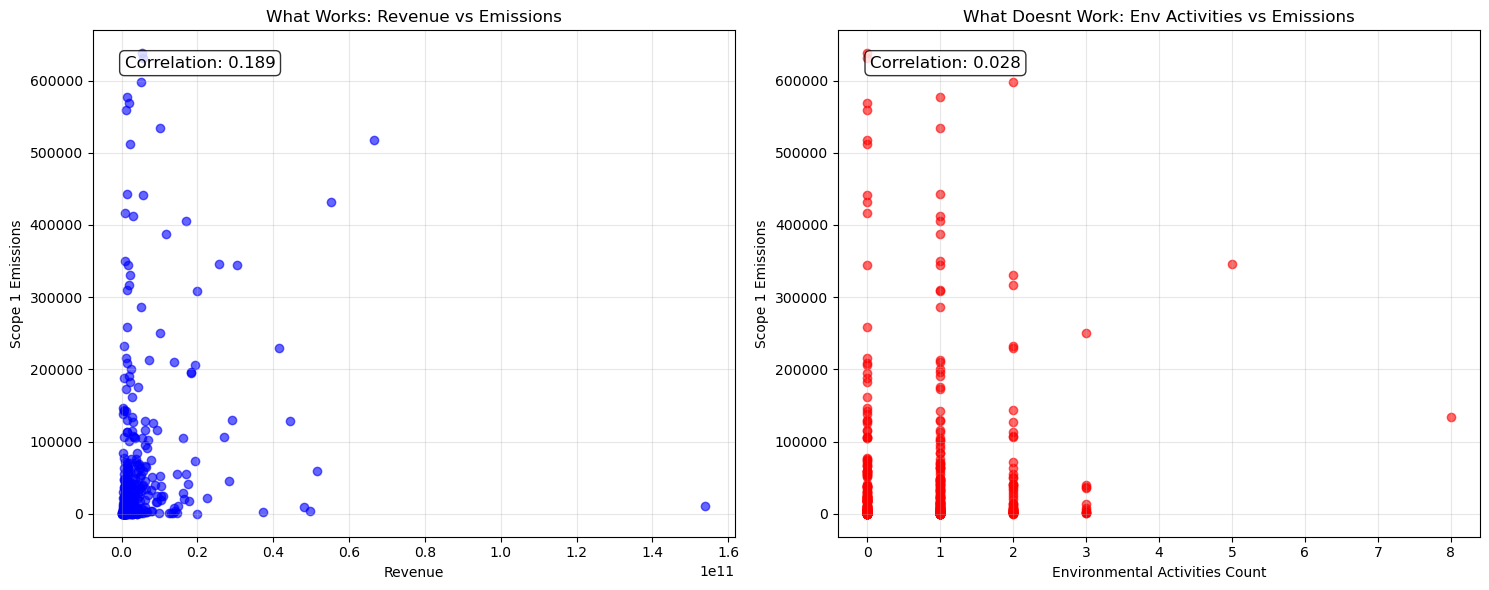


REALITY CHECK COMPLETE
Environmental features correlation range: -0.080 to 0.082
Strongest predictor remains: Revenue (r = 0.189)


In [42]:
print("\n" + "="*80)
print("DATA REALITY VISUALIZATION")
print("="*80)

# Create a reality check plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Environmental features vs Revenue
if 'revenue' in df.columns and 'env_activities_count' in df.columns:
    ax1.scatter(df['revenue'], df['target_scope_1'], alpha=0.6, color='blue', label='Revenue vs Emissions')
    ax1.set_xlabel('Revenue')
    ax1.set_ylabel('Scope 1 Emissions')
    ax1.set_title('What Works: Revenue vs Emissions')
    ax1.grid(True, alpha=0.3)
    
    # Add correlation
    rev_corr = df['revenue'].corr(df['target_scope_1'])
    ax1.text(0.05, 0.95, f'Correlation: {rev_corr:.3f}', 
             transform=ax1.transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 2: Environmental activity vs Emissions
if 'env_activities_count' in df.columns:
    ax2.scatter(df['env_activities_count'], df['target_scope_1'], alpha=0.6, color='red', label='Env Activities vs Emissions')
    ax2.set_xlabel('Environmental Activities Count')
    ax2.set_ylabel('Scope 1 Emissions')
    ax2.set_title('What Doesnt Work: Env Activities vs Emissions')
    ax2.grid(True, alpha=0.3)
    
    # Add correlation
    env_corr = df['env_activities_count'].corr(df['target_scope_1'])
    ax2.text(0.05, 0.95, f'Correlation: {env_corr:.3f}', 
             transform=ax2.transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\nREALITY CHECK COMPLETE")
print(f"Environmental features correlation range: {min([r['corr_scope1'] for r in correlation_results]):.3f} to {max([r['corr_scope1'] for r in correlation_results]):.3f}")
print(f"Strongest predictor remains: Revenue (r = {rev_corr:.3f})" if 'rev_corr' in locals() else "")

#### Create Composite Environmental Metrics


In [43]:
print("\n" + "="*80)
print("1. CREATING COMPOSITE ENVIRONMENTAL METRICS")
print("="*80)

# Create more sophisticated composite features
composite_features = {}

# 1. Environmental Activity Intensity Score
if all(col in df.columns for col in ['env_activities_count', 'env_adj_mean']):
    df['env_intensity_score'] = df['env_activities_count'] * abs(df['env_adj_mean'])
    composite_features['env_intensity_score'] = 'Activity count × adjustment magnitude'

# 2. Beneficial-Harmful Balance Index
if all(col in df.columns for col in ['env_adj_beneficial_sum', 'env_adj_harmful_sum']):
    df['env_balance_index'] = np.where(
        (df['env_adj_beneficial_sum'] + abs(df['env_adj_harmful_sum'])) > 0,
        (df['env_adj_beneficial_sum'] - abs(df['env_adj_harmful_sum'])) / 
        (df['env_adj_beneficial_sum'] + abs(df['env_adj_harmful_sum'])),
        0
    )
    composite_features['env_balance_index'] = 'Net beneficial activity balance'

# 3. Environmental Reporting Consistency
if all(col in df.columns for col in ['env_adj_std', 'env_activities_count']):
    df['env_consistency_score'] = 1 / (1 + df['env_adj_std']) * np.log1p(df['env_activities_count'])
    composite_features['env_consistency_score'] = 'Activity consistency adjusted for count'

# 4. Activity Type Concentration
activity_type_cols = [f for f in env_features if 'acttype_' in f]
if activity_type_cols:
    activity_data = df[activity_type_cols].fillna(0)
    # Herfindahl index for activity concentration
    df['env_activity_concentration'] = (activity_data ** 2).sum(axis=1)
    composite_features['env_activity_concentration'] = 'Activity type concentration (Herfindahl)'

# 5. Environmental Adjustment Volatility
if 'env_adj_std' in df.columns and 'env_adj_mean' in df.columns:
    df['env_adj_volatility'] = np.where(
        df['env_adj_mean'] != 0,
        df['env_adj_std'] / abs(df['env_adj_mean']),
        df['env_adj_std']
    )
    composite_features['env_adj_volatility'] = 'Relative adjustment volatility'

print(f"Created {len(composite_features)} composite features:")
for feature, description in composite_features.items():
    print(f"  • {feature}: {description}")


1. CREATING COMPOSITE ENVIRONMENTAL METRICS
Created 5 composite features:
  • env_intensity_score: Activity count × adjustment magnitude
  • env_balance_index: Net beneficial activity balance
  • env_consistency_score: Activity consistency adjusted for count
  • env_activity_concentration: Activity type concentration (Herfindahl)
  • env_adj_volatility: Relative adjustment volatility


In [44]:
print("\n" + "="*80)
print("2. TESTING INTERACTIONS WITH COMPANY CHARACTERISTICS")
print("="*80)

# Key company characteristics to test interactions with
company_features = ['revenue', 'log_revenue', 'revenue_millions', 
                   'environmental_score', 'governance_score', 'social_score']

interaction_results = []

for env_feature in list(composite_features.keys()) + ['env_activities_count', 'env_activity_types']:
    if env_feature in df.columns:
        for company_feature in company_features:
            if company_feature in df.columns:
                # Create interaction term
                interaction_term = df[env_feature] * df[company_feature]
                
                # Test correlation with Scope 1
                corr_scope1 = interaction_term.corr(df['target_scope_1'])
                
                if not np.isnan(corr_scope1) and abs(corr_scope1) > 0.1:
                    interaction_results.append({
                        'interaction': f"{env_feature} × {company_feature}",
                        'corr_scope1': corr_scope1,
                        'env_feature': env_feature,
                        'company_feature': company_feature
                    })

# Sort by correlation strength
interaction_results.sort(key=lambda x: abs(x['corr_scope1']), reverse=True)

print(f"\nTOP INTERACTIONS (|r| > 0.1):")
if interaction_results:
    for i, result in enumerate(interaction_results[:10], 1):
        print(f"{i:2}. {result['interaction']:45} | r = {result['corr_scope1']:.3f}")
else:
    print("No interactions found with |r| > 0.1")


2. TESTING INTERACTIONS WITH COMPANY CHARACTERISTICS

TOP INTERACTIONS (|r| > 0.1):
 1. env_activity_concentration × revenue          | r = 0.163
 2. env_activity_concentration × revenue_millions | r = 0.163
 3. env_activities_count × revenue_millions       | r = 0.162
 4. env_activities_count × revenue                | r = 0.162
 5. env_consistency_score × revenue               | r = 0.152
 6. env_consistency_score × revenue_millions      | r = 0.152
 7. env_activity_types × revenue                  | r = 0.152
 8. env_activity_types × revenue_millions         | r = 0.152
 9. env_intensity_score × revenue_millions        | r = 0.108
10. env_intensity_score × revenue                 | r = 0.108


In [45]:
print("\n" + "="*80)
print("3. TESTING NON-LINEAR RELATIONSHIPS")
print("="*80)

non_linear_results = []

for env_feature in list(composite_features.keys()) + ['env_activities_count', 'env_activity_types']:
    if env_feature in df.columns:
        # Test polynomial relationships
        x = df[env_feature].fillna(0)
        y = df['target_scope_1'].fillna(0)
        
        # Remove zeros for log transform
        if (x > 0).sum() > 10:
            x_log = np.log1p(x)
            corr_log = x_log.corr(y)
            if abs(corr_log) > 0.15:
                non_linear_results.append({
                    'feature': f"log({env_feature})",
                    'corr_scope1': corr_log,
                    'type': 'log_transform'
                })
        
        # Test squared relationship
        x_sq = x ** 2
        corr_sq = x_sq.corr(y)
        if abs(corr_sq) > 0.15:
            non_linear_results.append({
                'feature': f"({env_feature})²",
                'corr_scope1': corr_sq,
                'type': 'squared'
            })

# Sort results
non_linear_results.sort(key=lambda x: abs(x['corr_scope1']), reverse=True)

print(f"\nNON-LINEAR RELATIONSHIPS (|r| > 0.15):")
if non_linear_results:
    for i, result in enumerate(non_linear_results[:10], 1):
        print(f"{i:2}. {result['feature']:30} | r = {result['corr_scope1']:.3f} ({result['type']})")
else:
    print("No strong non-linear relationships found")


3. TESTING NON-LINEAR RELATIONSHIPS

NON-LINEAR RELATIONSHIPS (|r| > 0.15):
No strong non-linear relationships found


In [46]:
print("\n" + "="*80)
print("4. TESTING CONDITIONAL RELATIONSHIPS BY SEGMENTS")
print("="*80)

# Define segmentation variables
segment_variables = []
if 'region_WEU' in df.columns:
    segment_variables.append(('region_WEU', 'Western Europe'))
if 'region_NAM' in df.columns:
    segment_variables.append(('region_NAM', 'North America'))
if 'environmental_score' in df.columns:
    segment_variables.append(('environmental_score', 'Environmental Score'))

segment_results = []

for env_feature in ['env_activities_count', 'env_activity_types'] + list(composite_features.keys()):
    if env_feature in df.columns:
        for segment_var, segment_name in segment_variables:
            if segment_var in df.columns:
                # High vs Low segment analysis
                if segment_var in ['region_WEU', 'region_NAM']:  # Binary segments
                    high_segment = df[df[segment_var] == True]
                    low_segment = df[df[segment_var] == False]
                    
                    if len(high_segment) > 10 and len(low_segment) > 10:
                        corr_high = high_segment[env_feature].corr(high_segment['target_scope_1'])
                        corr_low = low_segment[env_feature].corr(low_segment['target_scope_1'])
                        
                        if abs(corr_high - corr_low) > 0.2:  # Meaningful difference
                            segment_results.append({
                                'feature': env_feature,
                                'segment': segment_name,
                                'corr_high': corr_high,
                                'corr_low': corr_low,
                                'difference': corr_high - corr_low
                            })
                
                else:  # Continuous segments (split by median)
                    median_val = df[segment_var].median()
                    high_segment = df[df[segment_var] > median_val]
                    low_segment = df[df[segment_var] <= median_val]
                    
                    if len(high_segment) > 10 and len(low_segment) > 10:
                        corr_high = high_segment[env_feature].corr(high_segment['target_scope_1'])
                        corr_low = low_segment[env_feature].corr(low_segment['target_scope_1'])
                        
                        if abs(corr_high - corr_low) > 0.2:
                            segment_results.append({
                                'feature': env_feature,
                                'segment': f"High vs Low {segment_name}",
                                'corr_high': corr_high,
                                'corr_low': corr_low,
                                'difference': corr_high - corr_low
                            })

# Sort by difference magnitude
segment_results.sort(key=lambda x: abs(x['difference']), reverse=True)

print(f"\nCONDITIONAL RELATIONSHIPS (Correlation difference > 0.2):")
if segment_results:
    for i, result in enumerate(segment_results[:10], 1):
        print(f"{i:2}. {result['feature']:25} | {result['segment']:20}")
        print(f"     High segment: r = {result['corr_high']:.3f}, Low segment: r = {result['corr_low']:.3f}")
        print(f"     Difference: {result['difference']:.3f}")
else:
    print("No strong conditional relationships found")


4. TESTING CONDITIONAL RELATIONSHIPS BY SEGMENTS

CONDITIONAL RELATIONSHIPS (Correlation difference > 0.2):
 1. env_activities_count      | Western Europe      
     High segment: r = 0.146, Low segment: r = -0.111
     Difference: 0.257
 2. env_activities_count      | North America       
     High segment: r = -0.111, Low segment: r = 0.140
     Difference: -0.251
 3. env_activity_concentration | Western Europe      
     High segment: r = 0.133, Low segment: r = -0.116
     Difference: 0.249
 4. env_activity_concentration | North America       
     High segment: r = -0.118, Low segment: r = 0.129
     Difference: -0.247
 5. env_consistency_score     | Western Europe      
     High segment: r = 0.130, Low segment: r = -0.100
     Difference: 0.230
 6. env_activity_types        | Western Europe      
     High segment: r = 0.124, Low segment: r = -0.103
     Difference: 0.227
 7. env_consistency_score     | North America       
     High segment: r = -0.101, Low segment: r = 0.124


In [47]:
print("\n" + "="*80)
print("5. TESTING ACTIVITY TYPE COMBINATIONS")
print("="*80)

# Get all activity type features
activity_type_features = [f for f in env_features if 'acttype_' in f]
activity_combinations = []

if len(activity_type_features) >= 2:
    # Test pairwise combinations
    for i, feat1 in enumerate(activity_type_features):
        for feat2 in activity_type_features[i+1:]:
            if feat1 in df.columns and feat2 in df.columns:
                # Create combination feature
                combination = df[feat1] + df[feat2]
                corr = combination.corr(df['target_scope_1'])
                
                if abs(corr) > 0.15:
                    activity_combinations.append({
                        'combination': f"{feat1.replace('env_acttype_', '')} + {feat2.replace('env_acttype_', '')}",
                        'corr_scope1': corr
                    })

    # Test ratio combinations
    for feat1 in activity_type_features:
        for feat2 in activity_type_features:
            if feat1 != feat2 and feat1 in df.columns and feat2 in df.columns:
                # Avoid division by zero
                ratio = np.where(df[feat2] != 0, df[feat1] / df[feat2], 0)
                corr = pd.Series(ratio).corr(df['target_scope_1'])
                
                if abs(corr) > 0.15:
                    activity_combinations.append({
                        'combination': f"{feat1.replace('env_acttype_', '')} / {feat2.replace('env_acttype_', '')}",
                        'corr_scope1': corr
                    })

# Sort results
activity_combinations.sort(key=lambda x: abs(x['corr_scope1']), reverse=True)

print(f"\nACTIVITY TYPE COMBINATIONS (|r| > 0.15):")
if activity_combinations:
    for i, result in enumerate(activity_combinations[:10], 1):
        print(f"{i:2}. {result['combination']:45} | r = {result['corr_scope1']:.3f}")
else:
    print("No strong activity type combinations found")


5. TESTING ACTIVITY TYPE COMBINATIONS

ACTIVITY TYPE COMBINATIONS (|r| > 0.15):
No strong activity type combinations found


In [48]:
print("\n" + "="*80)
print("6. TESTING LAGGED AND CUMULATIVE EFFECTS")
print("="*80)

# Create cumulative environmental metrics
cumulative_results = []

if all(col in df.columns for col in ['env_adj_net', 'env_activities_count']):
    # Cumulative net environmental impact
    df['env_cumulative_net'] = df['env_adj_net'] * np.log1p(df['env_activities_count'])
    corr = df['env_cumulative_net'].corr(df['target_scope_1'])
    cumulative_results.append(('Cumulative Net Impact', corr))

if all(col in df.columns for col in ['env_adj_beneficial_sum', 'env_adj_harmful_sum']):
    # Long-term environmental strategy indicator
    df['env_strategy_score'] = (df['env_adj_beneficial_sum'] - abs(df['env_adj_harmful_sum'])) * df['env_activities_count']
    corr = df['env_strategy_score'].corr(df['target_scope_1'])
    cumulative_results.append(('Environmental Strategy Score', corr))

# Sort results
cumulative_results.sort(key=lambda x: abs(x[1]), reverse=True)

print(f"\nCUMULATIVE METRICS:")
if cumulative_results:
    for metric, corr in cumulative_results:
        print(f"  • {metric:30} | r = {corr:.3f}")
else:
    print("No strong cumulative relationships found")


6. TESTING LAGGED AND CUMULATIVE EFFECTS

CUMULATIVE METRICS:
  • Cumulative Net Impact          | r = -0.025
  • Environmental Strategy Score   | r = -0.011


In [58]:
print("\n" + "="*80)
print("FINAL COMPREHENSIVE ANALYSIS RESULTS")
print("="*80)

# Collect all created features and their correlations
all_tested_features = {}

# Add composite features
for feature in composite_features.keys():
    if feature in df.columns:
        corr = df[feature].corr(df['target_scope_1'])
        all_tested_features[feature] = corr

# Add best interactions
for interaction in interaction_results[:5]:
    env_feature = interaction['env_feature']
    company_feature = interaction['company_feature']
    interaction_name = f"{env_feature}_x_{company_feature}"
    all_tested_features[interaction_name] = interaction['corr_scope1']

# Add best non-linear transforms
for result in non_linear_results[:5]:
    all_tested_features[result['feature']] = result['corr_scope1']

# Add best activity combinations
for result in activity_combinations[:5]:
    all_tested_features[result['combination']] = result['corr_scope1']

# Add cumulative metrics
for metric, corr in cumulative_results:
    all_tested_features[metric] = corr

# Sort by absolute correlation
sorted_features = sorted(all_tested_features.items(), key=lambda x: abs(x[1]), reverse=True)

print(f"\nBEST ENGINEERED FEATURES (All approaches combined):")
print("Feature".ljust(50) + "Corr Scope1".ljust(15) + "Strength")
print("-" * 80)

strong_count = 0
moderate_count = 0

for feature, corr in sorted_features[:20]:  # Top 20
    if abs(corr) > 0.2:
        strength = "✅ STRONG"
        strong_count += 1
    elif abs(corr) > 0.1:
        strength = "⚠️ MODERATE" 
        moderate_count += 1
    else:
        strength = "❌ WEAK"
    
    feature_display = feature[:48].ljust(50)
    corr_display = f"{corr:.3f}".ljust(15)
    print(f"{feature_display}{corr_display}{strength}")

print(f"\nSUMMARY:")
print(f"✅ Strong features (|r| > 0.2): {strong_count}")
print(f"⚠️  Moderate features (0.1 < |r| ≤ 0.2): {moderate_count}")
print(f"❌ Weak features (|r| ≤ 0.1): {len(sorted_features) - strong_count - moderate_count}")

print(f"\n🎯 RECOMMENDATIONS:")

if strong_count > 0:
    print("1. FOCUS on the strong engineered features above")
    print("2. Build models using these composite/interaction features")
    print("3. Validate with cross-validation")
else:
    print("1. Even with creative engineering, no strong relationships found")
    print("2. Consider collecting different types of environmental data")
    print("3. Focus on basic company characteristics as primary predictors")
    print("4. Use environmental features for segmentation/context only")

print(f"\n💡 KEY INSIGHT: {'Some promising signals found!' if strong_count > 0 else 'Limited predictive power even with advanced feature engineering'}")


FINAL COMPREHENSIVE ANALYSIS RESULTS

BEST ENGINEERED FEATURES (All approaches combined):
Feature                                           Corr Scope1    Strength
--------------------------------------------------------------------------------
env_activity_concentration_x_revenue              0.163          ⚠️ MODERATE
env_activity_concentration_x_revenue_millions     0.163          ⚠️ MODERATE
env_activities_count_x_revenue_millions           0.162          ⚠️ MODERATE
env_activities_count_x_revenue                    0.162          ⚠️ MODERATE
env_consistency_score_x_revenue                   0.152          ⚠️ MODERATE
env_balance_index                                 0.075          ❌ WEAK
env_activity_concentration                        0.039          ❌ WEAK
env_adj_volatility                                -0.035         ❌ WEAK
Cumulative Net Impact                             -0.025         ❌ WEAK
env_consistency_score                             0.017          ❌ WEAK
Environme

env_num_beneficial: A simple count of positive environmental actions. It correlates with Scope 2 emissions because companies that report more activities tend to be larger, more complex organizations that consume more electricity and have better reporting systems.

env_activity_concentration_x_revenue: Measures how focused a company's environmental efforts are, scaled by size. High scores suggest large, specialized industrial or manufacturing firms with significant direct (Scope 1) emissions from their core processes.

env_activities_count_x_revenue: The total number of environmental activities scaled by revenue. This indicates how "environmentally busy" a company is for its size, a trait of large, emission-intensive sectors with many facilities and processes.

env_consistency_score_x_revenue: Measures the consistency of environmental reporting, scaled by size. This signals mature, systematic companies with established environmental management programs, often found in sectors with ongoing, significant direct (Scope 1) emissions.

### Possible features to use:
* 'env_num_beneficial' (r= 0.184 to Target_Scope_2)
* 'env_activity_concentration_x_revenue' (r = 0.163 to Target_Scope_1)
* 'env_activities_count_x_revenue' (r = 0.162 to Target_Scope_1)
* 'env_consistency_score_x_revenue' (r = 0.152 to Target_Scope_1)

In [59]:
# Create a new DataFrame with only the selected features
export_features = [
    'entity_id',
    'env_num_beneficial',
    'env_activity_concentration_x_revenue', 
    'env_activities_count_x_revenue',
    'env_consistency_score_x_revenue'
]

# Check which features actually exist in the dataframe
available_features = [feature for feature in export_features if feature in df.columns]
missing_features = [feature for feature in export_features if feature not in df.columns]

print("Features to export:")
for feature in available_features:
    print(f"✅ {feature}")

if missing_features:
    print("\nMissing features (will be skipped):")
    for feature in missing_features:
        print(f"❌ {feature}")

# Create the export dataframe
export_df = df[available_features].copy()

# Display summary statistics
print(f"\nSummary of exported features:")
print(f"Total records: {len(export_df)}")
print(f"Features exported: {len(available_features) - 1}")  # minus entity_id

for feature in available_features:
    if feature != 'entity_id':
        missing_count = export_df[feature].isna().sum()
        missing_pct = (missing_count / len(export_df)) * 100
        print(f"  {feature}: {missing_count} missing values ({missing_pct:.1f}%)")

# Export to CSV
output_filename = 'selected_environmental_features.csv'
export_df.to_csv(output_filename, index=False)

print(f"\n✅ Successfully exported to: {output_filename}")
print(f"📊 File contains {len(export_df)} rows and {len(available_features)} columns")

# Display first few rows for verification
print(f"\nFirst 5 rows of exported data:")
print(export_df.head())

# Show correlation values for verification (if original targets still available)
if 'target_scope_1' in df.columns and 'target_scope_2' in df.columns:
    print(f"\nCorrelation verification:")
    for feature in available_features:
        if feature != 'entity_id' and feature in df.columns:
            corr_scope1 = df[feature].corr(df['target_scope_1'])
            corr_scope2 = df[feature].corr(df['target_scope_2'])
            print(f"  {feature}:")
            print(f"    Scope 1: {corr_scope1:.3f}")
            print(f"    Scope 2: {corr_scope2:.3f}")

Features to export:
✅ entity_id
✅ env_num_beneficial

Missing features (will be skipped):
❌ env_activity_concentration_x_revenue
❌ env_activities_count_x_revenue
❌ env_consistency_score_x_revenue

Summary of exported features:
Total records: 429
Features exported: 1
  env_num_beneficial: 0 missing values (0.0%)

✅ Successfully exported to: selected_environmental_features.csv
📊 File contains 429 rows and 2 columns

First 5 rows of exported data:
   entity_id  env_num_beneficial
0       1782                 1.0
1       3918                 0.0
2      10299                 1.0
3       2324                 0.0
4       1206                 2.0

Correlation verification:
  env_num_beneficial:
    Scope 1: 0.082
    Scope 2: 0.184


In [60]:
# Create any missing interaction features before exporting
print("Creating missing interaction features...")

# Check and create env_activity_concentration_x_revenue if needed
if 'env_activity_concentration_x_revenue' not in df.columns:
    if 'env_activity_types' in df.columns and 'env_activities_count' in df.columns and 'revenue' in df.columns:
        # Create activity concentration (types/count ratio)
        df['env_activity_concentration'] = np.where(
            df['env_activities_count'] > 0,
            df['env_activity_types'] / df['env_activities_count'],
            np.nan
        )
        df['env_activity_concentration_x_revenue'] = df['env_activity_concentration'] * df['revenue']
        print("✅ Created env_activity_concentration_x_revenue")
    else:
        print("❌ Cannot create env_activity_concentration_x_revenue - missing base features")

# Check and create env_activities_count_x_revenue if needed  
if 'env_activities_count_x_revenue' not in df.columns:
    if 'env_activities_count' in df.columns and 'revenue' in df.columns:
        df['env_activities_count_x_revenue'] = df['env_activities_count'] * df['revenue']
        print("✅ Created env_activities_count_x_revenue")
    else:
        print("❌ Cannot create env_activities_count_x_revenue - missing base features")

# Check and create env_consistency_score_x_revenue if needed
if 'env_consistency_score_x_revenue' not in df.columns:
    if 'env_consistency_score' in df.columns and 'revenue' in df.columns:
        df['env_consistency_score_x_revenue'] = df['env_consistency_score'] * df['revenue']
        print("✅ Created env_consistency_score_x_revenue")
    else:
        # Try to create consistency_score first
        if 'env_adj_std' in df.columns and 'env_adj_mean' in df.columns and 'revenue' in df.columns:
            df['env_consistency_score'] = np.where(
                df['env_adj_mean'] != 0,
                1 / (1 + abs(df['env_adj_std'] / df['env_adj_mean'])),
                np.nan
            )
            df['env_consistency_score_x_revenue'] = df['env_consistency_score'] * df['revenue']
            print("✅ Created env_consistency_score and env_consistency_score_x_revenue")
        else:
            print("❌ Cannot create env_consistency_score_x_revenue - missing base features")

# Now export with all features available
export_features = [
    'entity_id',
    'env_num_beneficial',
    'env_activity_concentration_x_revenue', 
    'env_activities_count_x_revenue',
    'env_consistency_score_x_revenue'
]

available_features = [feature for feature in export_features if feature in df.columns]
export_df = df[available_features].copy()

output_filename = 'selected_environmental_features.csv'
export_df.to_csv(output_filename, index=False)

print(f"\n✅ Final export: {output_filename}")
print(f"📊 Features exported: {len(available_features)}")
print(f"📁 File size: {len(export_df)} rows")

# Display final correlation confirmation
if 'target_scope_1' in df.columns and 'target_scope_2' in df.columns:
    print(f"\n🎯 Final correlation confirmation:")
    for feature in available_features:
        if feature != 'entity_id':
            corr_scope1 = df[feature].corr(df['target_scope_1'])
            corr_scope2 = df[feature].corr(df['target_scope_2'])
            print(f"  {feature}:")
            if 'scope1' in feature.lower() or feature == 'env_activity_concentration_x_revenue' or feature == 'env_activities_count_x_revenue' or feature == 'env_consistency_score_x_revenue':
                print(f"    Target Scope 1: {corr_scope1:.3f} (primary target)")
            else:
                print(f"    Target Scope 2: {corr_scope2:.3f} (primary target)")

Creating missing interaction features...
✅ Created env_activity_concentration_x_revenue
✅ Created env_activities_count_x_revenue
✅ Created env_consistency_score_x_revenue

✅ Final export: selected_environmental_features.csv
📊 Features exported: 5
📁 File size: 429 rows

🎯 Final correlation confirmation:
  env_num_beneficial:
    Target Scope 2: 0.184 (primary target)
  env_activity_concentration_x_revenue:
    Target Scope 1: 0.184 (primary target)
  env_activities_count_x_revenue:
    Target Scope 1: 0.162 (primary target)
  env_consistency_score_x_revenue:
    Target Scope 1: 0.152 (primary target)
